In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import urllib
urllib.request.urlretrieve('https://raw.githubusercontent.com/zbz95/Intro_to_ML/refs/heads/main/clusters.csv', 'clusters.csv')

('clusters.csv', <http.client.HTTPMessage at 0x7f8c3d6fa910>)

In [ ]:
X = pd.read_csv('clusters.csv')

Вы владелец магазина. В данной таблице указаны данные о покупках проведенных постоянными посетителями вашего магазина. Всего есть данные 500 покупателей о количестве купленными ими 5 товаров (хлеб, молоко, мясо, шоколад, напитки)

In [ ]:
X

,milk,bread,meat,chocolate,drinks
0,37,64,30,13,31
1,53,47,12,68,10
2,36,50,20,21,35
3,7,18,46,41,63
4,54,46,16,66,4
...,...,...,...,...,...
495,66,70,7,39,17
496,53,48,22,62,6
497,44,42,57,73,30
498,9,15,58,47,62


##Упражнение 1

Необходимо определить количество кластеров в нашей таблице. Постройте модели Kmeans с разным количеством кластеров "K" от 1 до 10 и посчитайте "inertia_" для каждого "K"

In [ ]:
#Упражнение 1
list_of_inertia = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, n_init=15)
  kmeans.fit(X)
  list_of_inertia.append(kmeans.inertia_)

print(list_of_inertia)

[997847.6739999993, 486387.27166666655, 278411.6590987276, 103159.46499999998, 52459.32995099509, 49596.18664289957, 47120.40218309136, 44704.2754407487, 42434.80083388616, 40488.17622368975]


## Упражнение 2
Постройте график того как уменьшается inertia_ в зависимости от K. Используя метод локтя (Elbow method) определите оптимальное количество кластеров

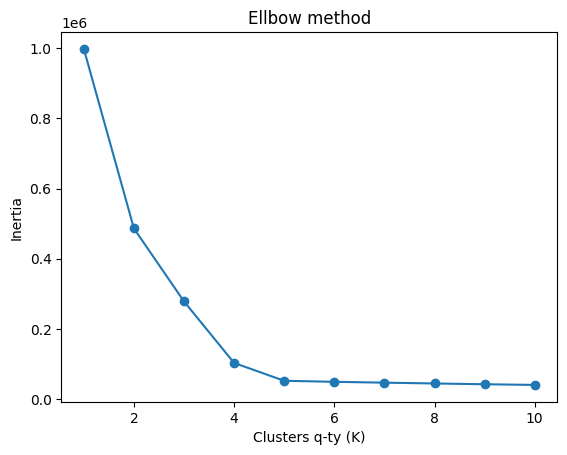

In [ ]:
plt.plot(range(1, 11), list_of_inertia, marker='o', linestyle='-')
plt.xlabel('Clusters q-ty (K)')
plt.ylabel('Inertia')
plt.title('Ellbow method')
plt.show()

In [ ]:
#Оптимальное кол-во кластеров: k=4

## Упражнение 3. Зная количество кластеров в наших данных поделите наши данные на кластеры используя KMeans

In [ ]:
# Обучаем модель KMeans
kmeans = KMeans(n_clusters=4, n_init=15, random_state=42)
kmeans.fit(X)
X['cluster_group'] = kmeans.predict(X)
print(X['cluster_group'].value_counts())

cluster_group
2    200
0    100
1    100
3    100
Name: count, dtype: int64


# Упражнение 4.

Выявите два наименее популярных вида товаров для каждого кластера

In [ ]:
cluster_product_counts = X.melt(id_vars=['cluster_group'], var_name='product_type', value_name='count')
cluster_product_counts = cluster_product_counts.groupby(['cluster_group', 'product_type'])['count'].sum().reset_index()
least_popular_products = cluster_product_counts.sort_values(['cluster_group', 'count']).groupby('cluster_group').head(2)
print(least_popular_products)


    cluster_group product_type  count
1               0    chocolate   1221
3               0         meat   2763
9               1         milk    708
5               1        bread   1294
12              2       drinks   2215
13              2         meat   3572
17              3       drinks   3022
15              3        bread   4261


## Упржанение 5

Выявите два самых популярных вида товара для каждого кластера

In [ ]:
most_popular_products = cluster_product_counts.sort_values(['cluster_group', 'count'], ascending=False).groupby('cluster_group').head(2)
print(most_popular_products)

    cluster_group product_type  count
16              3    chocolate   6635
18              3         meat   6176
14              2         milk  11935
10              2        bread  11886
7               1       drinks   6469
8               1         meat   5532
0               0        bread   6294
4               0         milk   3699
